In [2]:
import uproot
import h5py
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [3]:
def printattr(name, object):
    print(name)
h5py_file = h5py.File('ttbar_testing_sm/ttbar_testing_sm.h5', "r")
h5py_file.visititems(printattr)

jet_features
jet_features/barcode
jet_features/btag
jet_features/charge
jet_features/eta
jet_features/event
jet_features/mass
jet_features/num_of_jets
jet_features/phi
jet_features/pt
lepton_features
lepton_features/charge
lepton_features/eta
lepton_features/mass
lepton_features/phi
lepton_features/pid
lepton_features/pt
met_features
met_features/MET
met_features/eta
met_features/phi
met_features/sumet
neutrino_eta
neutrino_eta/spanet
neutrino_eta/target
parton_features
parton_features/eta
parton_features/masks
parton_features/mass
parton_features/parton_barcode
parton_features/pdgid
parton_features/phi
parton_features/pt
spanet
spanet/left_target
spanet/left_target/b
spanet/left_target/detection
spanet/left_target/mask
spanet/reconstructed_top_mass
spanet/right_target
spanet/right_target/b
spanet/right_target/detection
spanet/right_target/mask
spanet/right_target/q1
spanet/right_target/q2
target
target/left_target
target/left_target/b
target/left_target/lepton
target/left_target/mask


In [100]:
# Caululate delR
lepton_eta = h5py_file['lepton_features/eta'][:]
lepton_phi = h5py_file['lepton_features/phi'][:]
jet_eta = h5py_file['jet_features/eta'][:]
jet_phi = h5py_file['jet_features/phi'][:]
delR = np.array([np.sqrt((jet_eta[i] - lepton_eta[i])**2 + (jet_phi[i] - lepton_phi[i])**2) for i in range(len(jet_eta))])

In [56]:
# pid 11 is electron, 13 is muon.
cut_lepton_pt = np.logical_or(
                    np.logical_and(h5py_file['lepton_features/pt'][:] > 26, h5py_file['lepton_features/pid'][:] == 13),
                    np.logical_and(h5py_file['lepton_features/pt'][:] > 29, h5py_file['lepton_features/pid'][:] == 11))
cut_lepton_eta = np.abs(h5py_file['lepton_features/eta'][:]) < 2.4
cut_delR = np.logical_or(np.logical_and.reduce((h5py_file['lepton_features/pid'][:] == 13, delR[:, 0] > 0.4, delR[:, 1] > 0.4, delR[:, 2] > 0.4, delR[:, 3] > 0.4)),
           np.logical_and.reduce((h5py_file['lepton_features/pid'][:] == 11, delR[:, 0] > 0.3, delR[:, 1] > 0.3, delR[:, 2] > 0.3, delR[:, 3] > 0.3)))
cut_jet_pt = h5py_file['jet_features/pt'][:, 4] > 30
cut_jet_eta = np.logical_and.reduce((abs(h5py_file['jet_features/eta'][:, 0]) < 2.4, abs(h5py_file['jet_features/eta'][:, 1]) < 2.4,
                                     abs(h5py_file['jet_features/eta'][:, 2]) < 2.4, abs(h5py_file['jet_features/eta'][:, 3]) < 2.4))
cut_first4_btag = np.sum(h5py_file['jet_features/btag'][:, :4], axis=1) == 2

cuts = np.logical_and.reduce((cut_lepton_pt, cut_lepton_eta, cut_delR, cut_jet_pt, cut_jet_eta, cut_first4_btag))

In [64]:
cut_tmp = [True]*500000
cut_label = ['lepton pt', 'lepton eta', 'delR', 'jet pt', 'jet eta', 'btag']
for i, cut in enumerate([cut_lepton_pt, cut_lepton_eta, cut_delR, cut_jet_pt, cut_jet_eta, cut_first4_btag]):
    cut_tmp = np.logical_and(cut_tmp, cut)
    print('After {} cut'.format(cut_label[i]), np.count_nonzero(cut_tmp))

After lepton pt cut 481310
After lepton eta cut 479436
After delR cut 479436
After jet pt cut 185047
After jet eta cut 175101
After btag cut 109548


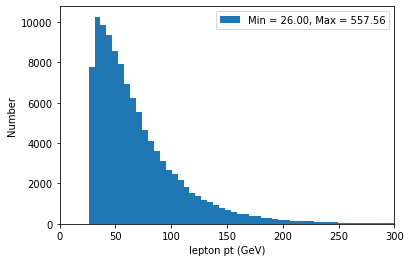

In [83]:
# plt.hist(h5py_file['lepton_features/pt'][:], bins=100, label = 'Min = {:.2f}, Max = {:.2f}'.format(min(h5py_file['lepton_features/pt'][:]), max(h5py_file['lepton_features/pt'][:])))
plt.hist(h5py_file['lepton_features/pt'][:][cuts], bins=100, label = 'Min = {:.2f}, Max = {:.2f}'.format(min(h5py_file['lepton_features/pt'][:][cuts]), max(h5py_file['lepton_features/pt'][:][cuts])))
plt.xlabel('lepton pt (GeV)')
plt.ylabel('Number')
plt.xlim(0, 300)
plt.legend(loc = 'upper right')
plt.show()

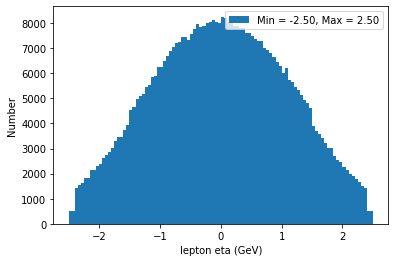

In [86]:
plt.hist(h5py_file['lepton_features/eta'][:], bins=100, label = 'Min = {:.2f}, Max = {:.2f}'.format(min(h5py_file['lepton_features/eta'][:]), max(h5py_file['lepton_features/eta'][:])))
# plt.hist(h5py_file['lepton_features/eta'][:][cuts], bins=100, label = 'Min = {:.2f}, Max = {:.2f}'.format(min(h5py_file['lepton_features/eta'][:][cuts]), max(h5py_file['lepton_features/eta'][:][cuts])))
plt.xlabel('lepton eta (GeV)')
plt.ylabel('Number')
plt.legend(loc = 'upper right')
plt.show()

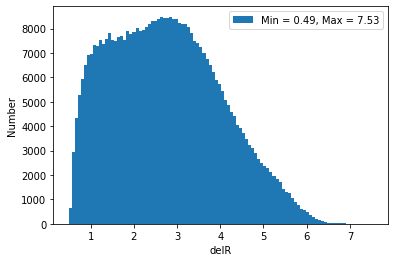

In [81]:
# plt.hist(delR[:, :4].flatten(), bins=100, label = 'Min = {:.2f}, Max = {:.2f}'.format(min(flatten_delR), max(flatten_delR)))
plt.hist(delR[:, :4][cuts].flatten(), bins=100, label = 'Min = {:.2f}, Max = {:.2f}'.format(min(delR[:, :4][cuts].flatten()), max(delR[:, :4][cuts].flatten())))
plt.xlabel('delR')
plt.ylabel('Number')
plt.legend(loc = 'upper right')
plt.show()

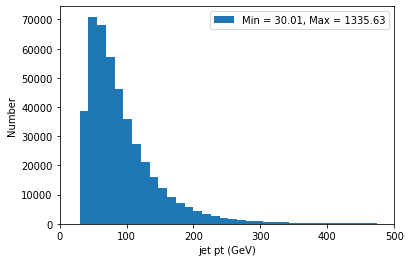

In [90]:
# plt.hist(h5py_file['jet_features/pt'][:, :4].flatten(), bins=100, label = 'Min = {:.2f}, Max = {:.2f}'.format(min(h5py_file['jet_features/pt'][:, :4].flatten()), max(h5py_file['jet_features/pt'][:, :4].flatten())))
plt.hist(h5py_file['jet_features/pt'][:, :4][cuts].flatten(), bins=100, label = 'Min = {:.2f}, Max = {:.2f}'.format(min(h5py_file['jet_features/pt'][:, :4][cuts].flatten()), max(h5py_file['jet_features/pt'][:, :4][cuts].flatten())))
plt.xlabel('jet pt (GeV)')
plt.ylabel('Number')
plt.xlim(0, 500)
plt.legend(loc = 'upper right')
plt.show()

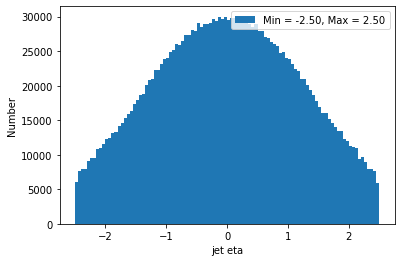

In [98]:
plt.hist(h5py_file['jet_features/eta'][:, :4].flatten(), bins=100, label = 'Min = {:.2f}, Max = {:.2f}'.format(min(h5py_file['jet_features/eta'][:, :4].flatten()), max(h5py_file['jet_features/eta'][:, :4].flatten())))
# plt.hist(h5py_file['jet_features/eta'][:, :4][cuts].flatten(), bins=100, label = 'Min = {:.2f}, Max = {:.2f}'.format(min(h5py_file['jet_features/eta'][:, :4][cuts].flatten()), max(h5py_file['jet_features/eta'][:, :4][cuts].flatten())))
plt.xlabel('jet eta')
plt.ylabel('Number')
plt.legend(loc = 'upper right')
plt.show()

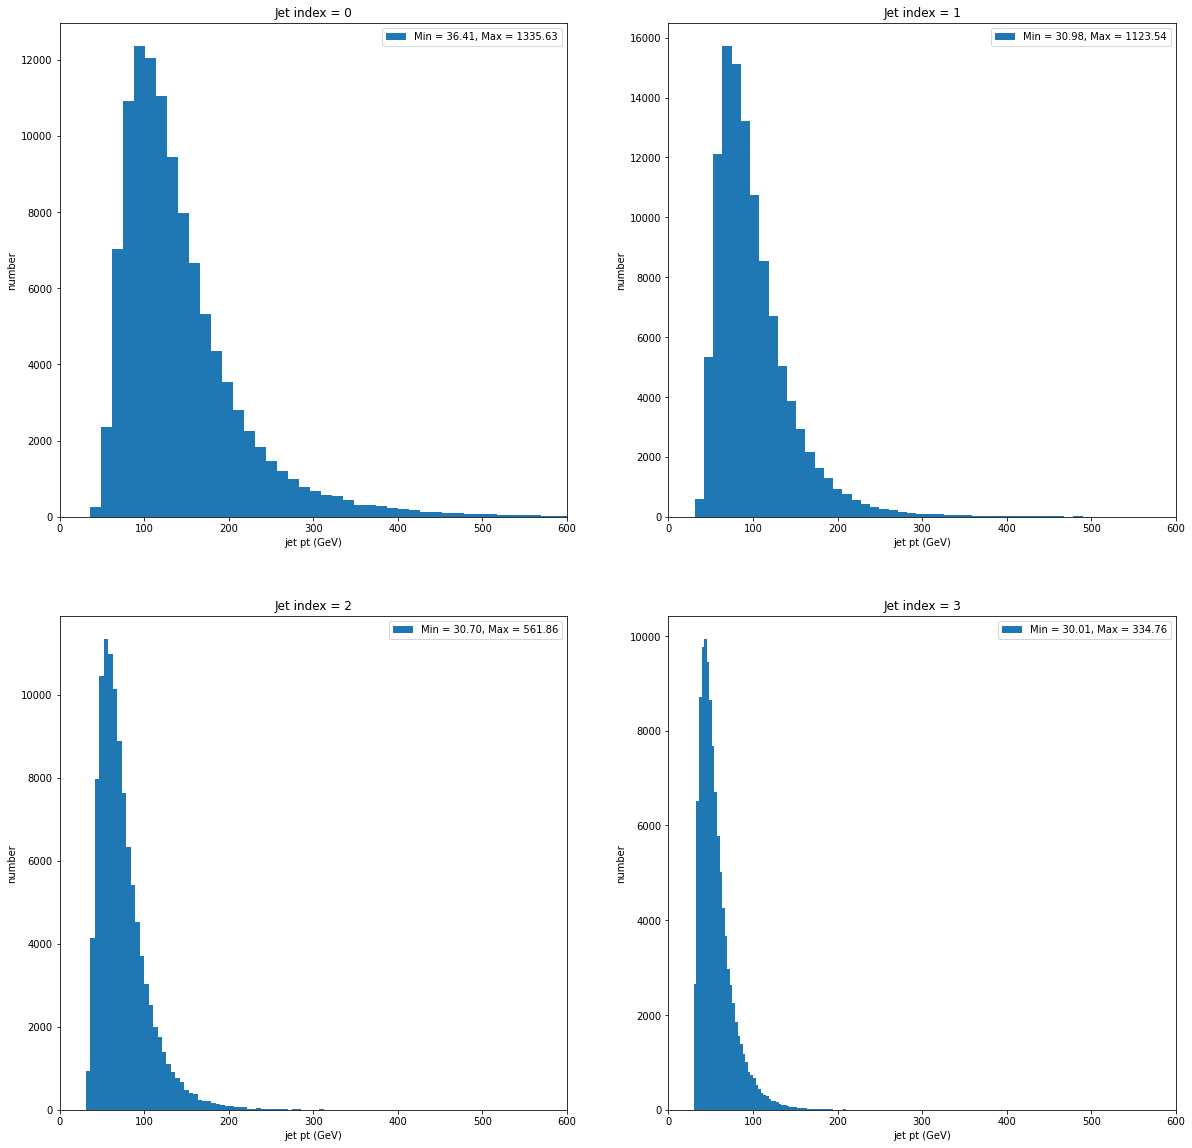

In [92]:
plt.figure(figsize=(20, 20))
for i in range(4):
    plt.subplot(2, 2, i+1)
    # plt.hist(h5py_file['jet_features/pt'][:,i], bins=100, label = 'Min = {:.2f}, Max = {:.2f}'.format(min(h5py_file['jet_features/pt'][:,i]), max(h5py_file['jet_features/pt'][:,i])))
    plt.hist(h5py_file['jet_features/pt'][:,i][cuts], bins=100, label = 'Min = {:.2f}, Max = {:.2f}'.format(min(h5py_file['jet_features/pt'][:,i][cuts]), max(h5py_file['jet_features/pt'][:,i][cuts])))
    plt.xlim(0, 600)
    plt.title('Jet index = {}'.format(i))
    plt.xlabel('jet pt (GeV)')
    plt.ylabel('number')
    plt.legend()
plt.show()

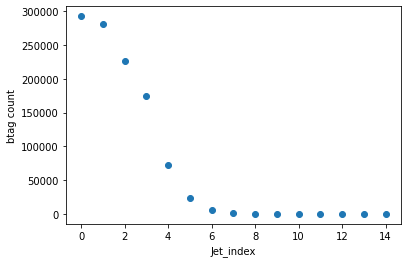

In [10]:
plt.scatter(range(15), np.sum(h5py_file['jet_features/btag'][:], axis=0))
plt.xlabel('Jet_index')
plt.ylabel('btag count')
plt.show()